In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Surgical-deepnet.csv')
data.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [3]:
data.shape

(14635, 25)

In [4]:
data.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [6]:
x=data.drop('complication',axis=1)
y=data['complication']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

## logistic regression


In [11]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred=lg.predict(x_test)
y_test

2133     0
7599     0
7474     0
10965    1
4171     0
        ..
4261     0
8847     0
3202     0
7859     0
6412     0
Name: complication, Length: 4391, dtype: int64

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('accuracy score',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3284
           1       0.67      0.32      0.43      1107

    accuracy                           0.79      4391
   macro avg       0.74      0.63      0.65      4391
weighted avg       0.77      0.79      0.76      4391

[[3107  177]
 [ 752  355]]
accuracy score 0.7884308813482123


## Decision tree classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
cls=DecisionTreeClassifier()
cls.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred=cls.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('accuracy score',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3284
           1       0.69      0.73      0.71      1107

    accuracy                           0.85      4391
   macro avg       0.80      0.81      0.80      4391
weighted avg       0.85      0.85      0.85      4391

[[2917  367]
 [ 297  810]]
accuracy score 0.8487815987246641


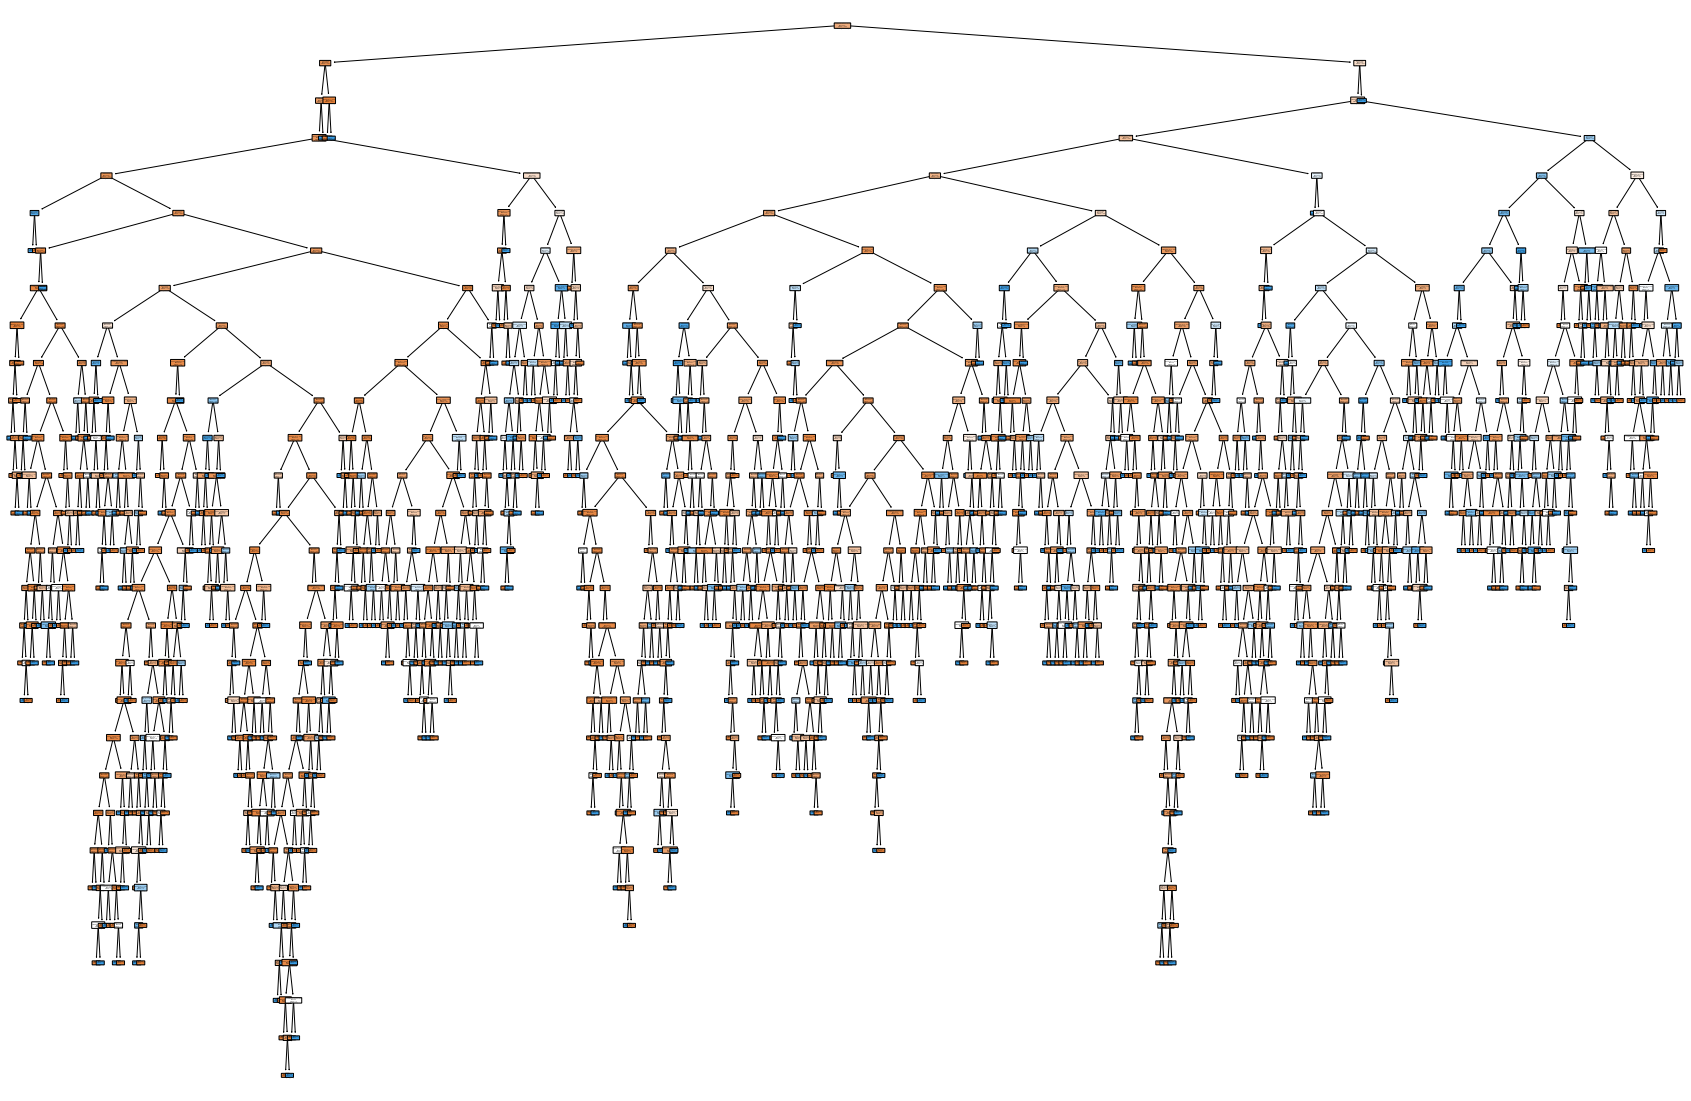

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plt.title('Decision Tree')
plot_tree(cls,feature_names=x_train.columns,filled=True,rounded=True)
plt.show()

## RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
y_pred=random.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('accuracy score',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3284
           1       0.83      0.63      0.71      1107

    accuracy                           0.87      4391
   macro avg       0.86      0.79      0.82      4391
weighted avg       0.87      0.87      0.87      4391

[[3142  142]
 [ 415  692]]
accuracy score 0.8731496242313824


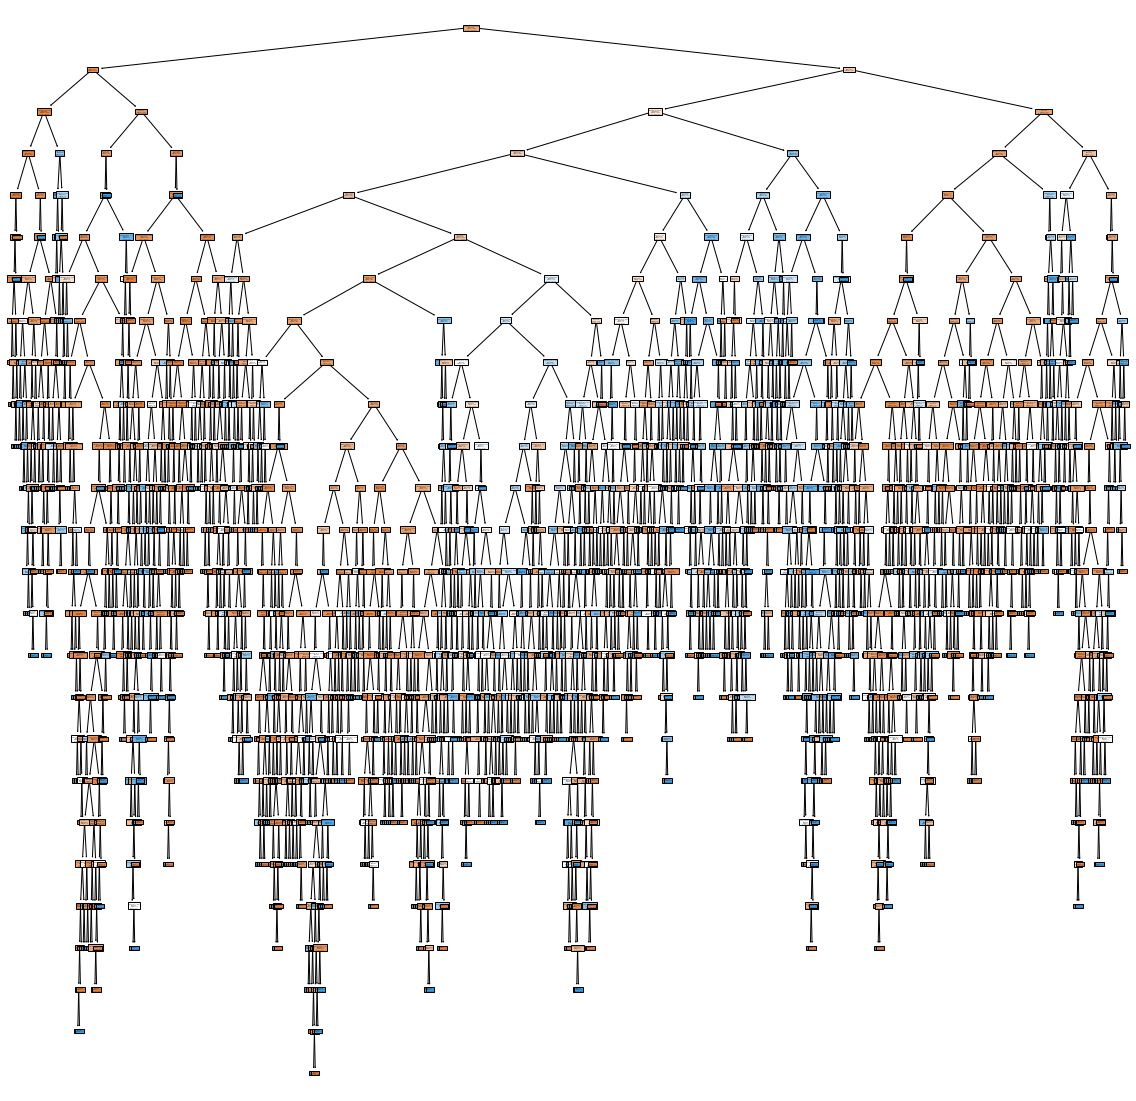

In [29]:
from dtreeviz.trees import dtreeviz
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(random.estimators_[0],feature_names=x.columns,filled=True)
plt.show()

## naive bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

gb=GaussianNB()
gb.fit(x_train,y_train)


GaussianNB()

In [44]:
y_pred=gb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('accuracy score',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      3284
           1       0.58      0.44      0.50      1107

    accuracy                           0.78      4391
   macro avg       0.70      0.66      0.68      4391
weighted avg       0.76      0.78      0.77      4391

[[2928  356]
 [ 622  485]]
accuracy score 0.7772716920974722


In [49]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB()

In [50]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('accuracy score',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      3284
           1       0.47      0.59      0.52      1107

    accuracy                           0.73      4391
   macro avg       0.66      0.68      0.67      4391
weighted avg       0.75      0.73      0.74      4391

[[2558  726]
 [ 458  649]]
accuracy score 0.7303575495331359
